<a href="https://colab.research.google.com/github/19PA1A0534/07-03-2020/blob/master/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression Algorithm

In [0]:
import pandas as pd#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/diabetes.csv')#reading the given dataset
df.head()#printing the first 5 rows in the dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.shape#printing the rows and columns in the dataset

(768, 9)

In [0]:
from sklearn.model_selection import train_test_split#importing the train test split method from scikit learn
from sklearn.linear_model import LogisticRegression#importing the logistic regression function
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,mean_absolute_error,classification_report#importing the errors

In [0]:
#Taking the independent variables or eploratory variables
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [0]:
#Taking the dependent variable
y=df['Outcome']

In [0]:
# splitting our data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [0]:
# creating a model
model= LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predicting using model
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [0]:
#predicted values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
sn

,actual,predicted
158,0,0
251,0,0
631,0,0
757,1,0
689,1,1
...,...,...
733,0,0
441,0,0
627,0,0
84,1,1


In [0]:
#accuracy of our model
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


In [0]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[96 13]
 [23 22]]


In [0]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



In [0]:
# roc and auc
print(roc_auc_score(y_test,y_pred))

0.6848114169215087


In [0]:
# error in the prediction
print(mean_absolute_error(y_test,y_pred))

0.23376623376623376


By keeping the random state as constant and we are changing the test size..

By changing the test size we are getting different accuracyscores..

And best accuracyscore is 76.5%



In [0]:
#displaying the required values
am=pd.DataFrame({'test_size':[0.2,0.3,0.4],'accuracy_score':[76.5,76.1,71.7],'error':[0.23,0.24,0.28]})
am

,test_size,accuracy_score,error
0,0.2,76.5,0.23
1,0.3,76.1,0.24
2,0.4,71.7,0.28


In [0]:
# as per the test_size we got highest accuracy when test_size=0.2

# KFold cross validation


In [0]:
#creating a model
model=LogisticRegression()

In [0]:
#importing packages
from sklearn.model_selection import KFold,cross_val_score
model=KFold(n_splits=3)

In [0]:
cross_val_score(LogisticRegression(),x,y).mean()*100

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


76.95696460402341

We performed KFold Cross Validation method to measure the acuracyscore..

And the final acuracy score:76.9%

# KNN Algorithm

In [0]:
# importing packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,mean_absolute_error,r2_score,classification_report

In [0]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)

In [0]:
model=K-nearest

In [0]:
#fitting the model
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
#predicting the values
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [0]:
#data frame of predicted and actual values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
print(sn)

     actual  predicted
158       0          0
251       0          0
631       0          0
757       1          1
689       1          1
..      ...        ...
328       1          0
112       0          0
618       1          0
665       0          0
642       1          1

[308 rows x 2 columns]


In [0]:
plt.bar(y_test,y_pred)

In [0]:
#accuracy of our model
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


In [0]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[180  25]
 [ 48  55]]


In [0]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.60      0.47      0.52        45

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154



In [0]:
#roc and auc 
print(roc_auc_score(y_test,y_pred))

0.7060146815060384


In [0]:
#error in the predicted values
print(mean_absolute_error(y_test,y_pred))

0.237012987012987


In [0]:
#dataset of accurcy and error
am=pd.DataFrame({'n_neighbors':[3,5,7],'accuracy_score':[72.07,73.05,76.29],'error':[0.27,0.26,0.23]})
am

,n_neighbors,accuracy_score,error
0,3,72.07,0.27
1,5,73.05,0.26
2,7,76.29,0.23


In [0]:
# we got highest accuracy when n_neighbors=7

# SVM Algorithm

In [0]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

In [0]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [0]:
#fitting the model
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predicting the values
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [0]:
#predicted values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
sn

In [0]:
#accuracy of model
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


In [0]:
#confusion matrix of model
print(confusion_matrix(y_test,y_pred))

[[95 14]
 [24 21]]


In [0]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.60      0.47      0.52        45

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154



In [0]:
#roc and auc score
print(roc_auc_score(y_test,y_pred))

0.6691131498470948


In [0]:
#error in the given model
print(mean_absolute_error(y_test,y_pred))

0.23376623376623376


In [0]:
#data set of accuracy and error
dat=pd.DataFrame({'kernel':['linear','rbf'],'accuracy':[75.32,76.62],'error':[0.24,0.23]})
dat

,kernel,accuracy,error
0,linear,75.32,0.24
1,rbf,76.62,0.23


In [0]:
#we have amximum accuracy when kernel=rbf..

In [0]:
plt.bar(y_test,y_pred)

# Decision Tree Algorithm

In [0]:
#importing packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [0]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [0]:
#creating the model
model=tree.DecisionTreeClassifier(max_depth=4)
b=model.fit(x_train,y_train)

In [0]:
#predicting the values
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

[Text(164.65359375, 209.6742857142857, 'X[1] <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(71.1763875, 194.14285714285714, 'X[7] <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(36.660599999999995, 178.61142857142858, 'X[5] <= 45.4\ngini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(24.4404, 163.07999999999998, 'X[5] <= 30.95\ngini = 0.139\nsamples = 267\nvalue = [247, 20]'),
 Text(8.0352, 147.54857142857142, 'X[0] <= 7.5\ngini = 0.026\nsamples = 151\nvalue = [149, 2]'),
 Text(5.3568, 132.01714285714286, 'X[6] <= 0.672\ngini = 0.013\nsamples = 150\nvalue = [149, 1]'),
 Text(2.6784, 116.48571428571428, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(8.0352, 116.48571428571428, 'X[6] <= 0.686\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(5.3568, 100.9542857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.7136, 100.9542857142857, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(10.7136, 132.01714285714286, 'gini = 0.0\ns

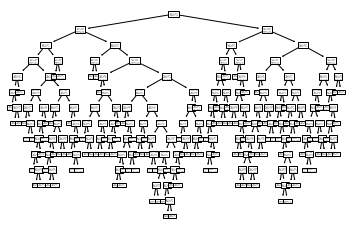

In [0]:
tree.plot_tree(b.fit(x,y))

In [0]:
#data set of actual and predicted values
sn=pd.DataFrame({'actual':y_test,'predicted':y_pred})
sn

,actual,predicted
158,0,0
251,0,0
631,0,0
757,1,1
689,1,1
...,...,...
733,0,0
441,0,0
627,0,0
84,1,1


In [0]:
#accuracy of model
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


In [0]:
#confusion of matrix
print(confusion_matrix(y_test,y_pred))

[[84 25]
 [20 25]]


In [0]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       109
           1       0.50      0.56      0.53        45

    accuracy                           0.71       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.72      0.71      0.71       154



In [0]:
#roc and auc 
print(roc_auc_score(y_test,y_pred))

0.663098878695209


In [0]:
#error in the model
print(mean_absolute_error(y_test,y_pred))

0.2922077922077922


In [0]:
#data frame of accuracy and error
am=pd.DataFrame({'max_depth':[1,2,4],'accuracy_score':[70.7,70.7,70.7],'error':[0.29,0.29,0.29]})
am

,max_depth,accuracy_score,error
0,1,70.7,0.29
1,2,70.7,0.29
2,4,70.7,0.29


In [0]:
# in this algorithim maximum accuracy is equal in all cases

# conclusion:

Based on the accuracies we have got ..

The best model for the given dataset is SVM..